<div class="alert alert-danger">
<h3>Setup for Google Colab only- otherwise ignore first cell</h3>
</div>

In [ ]:
#@title << Setup Google Colab by running this cell {display-mode: "form"}
import sys
if 'google.colab' in sys.modules:
    # Clone GitHub repository
    !git clone https://github.com/epfl-exts/amld20-anomaly-detection.git
        
    # Copy files required to run the code
    !cp -r "amld20-anomaly-detection/data" "amld20-anomaly-detection/anomaly_helpers.py" .
    
    # Install packages via pip
    !pip install -r "amld20-anomaly-detection/colab-requirements.txt"
    
    # Restart Runtime
    import os
    os.kill(os.getpid(), 9)

Cloning into 'amld20-anomaly-detection'...
remote: Enumerating objects: 48, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 48 (delta 21), reused 38 (delta 12), pack-reused 0
Unpacking objects: 100% (48/48), done.
     |████████████████████████████████| 17.3MB 253kB/s 
     |████████████████████████████████| 10.1MB 31.1MB/s 
     |████████████████████████████████| 13.0MB 143kB/s 
     |████████████████████████████████| 215kB 45.7MB/s 
     |████████████████████████████████| 6.7MB 47.1MB/s 
ERROR: xarray 0.15.1 has requirement pandas>=0.25, but you'll have pandas 0.24.2 which is incompatible.
ERROR: tensorflow 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.16.0 which is incompatible.
ERROR: pyarrow 3.0.0 has requirement numpy>=1.16.6, but you'll have numpy 1.16.0 which is incompatible.
ERROR: plotnine 0.6.0 has requirement matplotlib>=3.1.1, but you'll have matplotlib 3.0.3 which is incompatible.
ERROR: plo

## Load settings and functions

In [3]:
%run anomaly_helpers.py

## Create dataset

In [4]:
dataset=create_dataset()

Number of training samples to be used:
Please choose a number between 100 and 80819
 102

Portion of training samples to be attacks:
Please choose a number between 0 and 0.5 .
 0.3

Your dataset has been created.


<div class="alert alert-info">
<h3>Important</h3>

<p>When training the model we will only pass it the features of the samples. The model will never see the class labels, and hence can not gain any feedback from comparing them against its own 'decisions'.<br>
We call this <b>unsupervised learning</b>.</p>
    
<p>However, here we will use the class labels to gain further insight by analysing and visualising the data and later for evaluating our model in some more detail.</p>
</div>

## Explore the training data and visualise 1000 samples

1) We look at the distribution of different attack types in our training data.

2) We use a TSNE-plot to explore part of our training data.  
The TSNE-plot reduces our 51 features to 2 dimensions by trying to represent local structures faithfully.

Your training set has the following composition:


,frequency
class,
normal,71
neptune,11
satan,6
ipsweep,5
portsweep,3
nmap,2
back,2
smurf,1
warezclient,1


Plotting 1000 samples of the training data


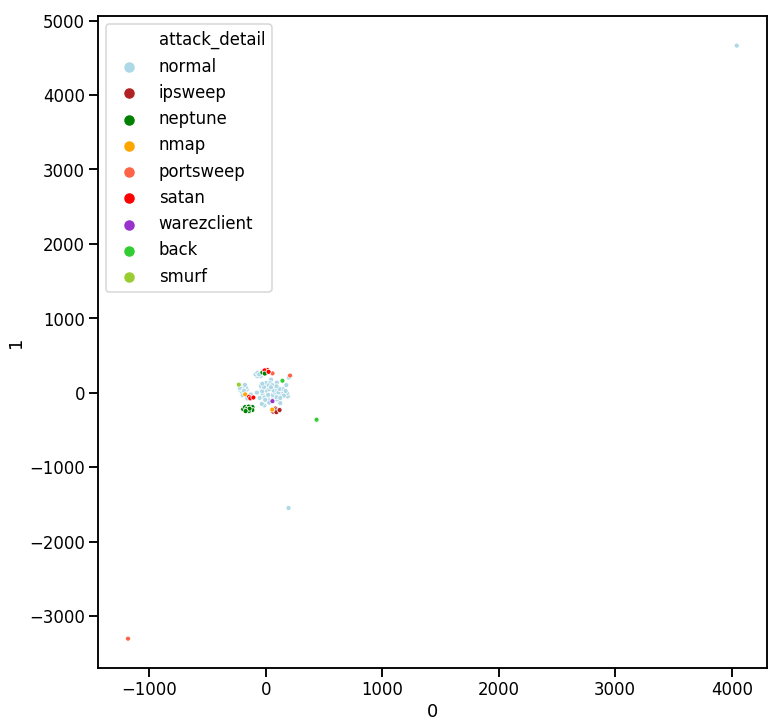

In [5]:
explore_and_visualise_training_data(dataset)

## Training our model

The **expected_contamination** is the portion of anomalies (attacks) that we expect in the real-life test set. This value is independent of the *portion of attacks* we chose to place in the training data.

**PCA (Principal Component Analysis)** transforms our data by trying to identify the directions (= combinations of features) in the data in which the data varies most. This might help the Isolation Forest algorithm to isolate anomalies faster, or it might not. 

In [6]:
model, dataset=build_anomaly_detector(dataset, 
                       expected_contamination=0.1,     # value between 0 and 0.5
                       with_PCA = False)                 # True / False

## Evaluating the performance

1) We take at look at the scores assigned by the **decision function** to our different samples. Samples with negative scores are marked as anomalies.

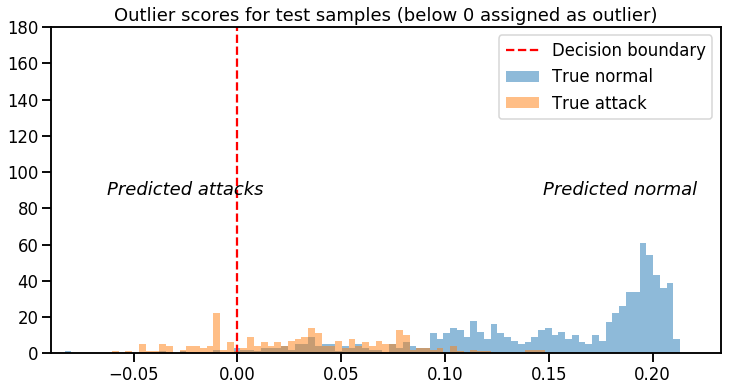

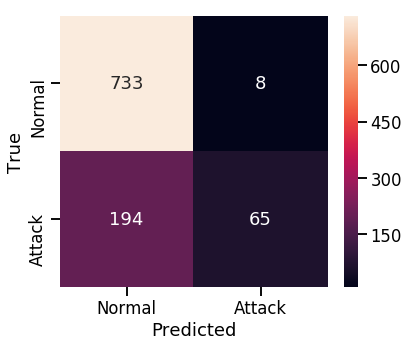

Summary report:
Attacks identified correctly (true positive): 65  of  259 ( 25.1 %)
Attacks missed (false negative): 194  of  259 ( 74.9 %)
False alarms (false positive): 8  of 741 ( 1.1 %)
Total number of misclassified samples: 202


In [7]:
evaluate_model(dataset,model)

## Taking a more detailed look at our performance

1) We look at the performance of our predictions at the level of individual attack types.

2) We locate the misclassified samples (triangles, colour gives true label) inside our test set.

Detailed report:


,present,missed,pct_missed
attack_detail,,,
normal,741,8,1.1
neptune,68,63,92.6
ipsweep,40,35,87.5
satan,40,24,60.0
portsweep,32,12,37.5
smurf,29,17,58.6
nmap,16,12,75.0
back,11,10,90.9
warezclient,10,10,100.0


Plotting 1000 samples of the test data


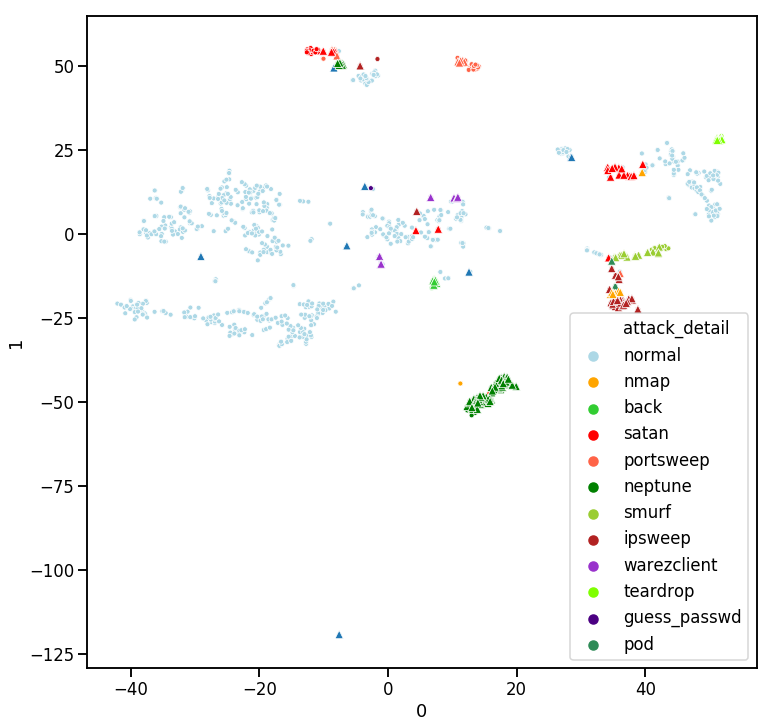

In [8]:
detailed_evaluation(dataset, model)

<div class="alert alert-success">
<h3>Task 1</h3>

Vary the `expected_contamination` parameter which is used by the model to make decisions.<br>    
What do you observe about distribution of the outlier scores and the position of the decision boundary?<br>
</div>

<div class="alert alert-success">
<h3>Task 2</h3>
    
Vary the size of your training data.<br> 
Vary the portion of attacks in your training data.<br>
In particular see how the model performs on totally clean data.<br>
</div>

<div class="alert alert-success">
<h3>Task 3</h3>
    
Use PCA for training your model by setting `with_PCA = True` when training the model. 
</div>